<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/2022%E6%95%B0%E5%AD%A6%E5%BB%BA%E6%A8%A1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# preparation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/dataset/MathModel/2022YES")
!ls

 2problem.xlsx	    data_type_2.xlsx	 output.xlsx	     'SimHei .ttf'
 3problem.xlsx	    data_type_3.xlsx	 qbf.xlsx	      temp.xlsx
 data1.xlsx	    data_type_4.xlsx	 qbtransformed.xlsx   附件.xlsx
 data_type_1.xlsx   k_transfromed.xlsx	 qbw.xlsx


In [4]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"
import matplotlib.pyplot as plt
import matplotlib as mpl
zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
!gdown --id 1fsKERl26TNTFIY25PhReoCujxwJvfyHn

--2022-09-17 11:51:33--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  29.3MB/s    in 0.3s    

2022-09-17 11:51:34 (29.3 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1fsKERl26TNTFIY25PhReoCujxwJvfyHn
To: /content/drive/MyDrive/dataset/MathModel/2022YES/SimHei .ttf
100% 10.1M/10.1M [00:00<00:00, 37

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')

In [6]:

data1 = pd.read_excel("data1.xlsx")
data1['编号'] = data1['文物编号']
data1 = data1.drop(['文物编号'], axis = 1)
data1

,纹饰,类型,颜色,表面风化,编号
0,C,高钾,4,无风化,1
1,A,铅钡,5,风化,2
2,A,高钾,4,无风化,3
3,A,高钾,4,无风化,4
4,A,高钾,4,无风化,5
5,A,高钾,4,无风化,6
6,B,高钾,4,风化,7
7,C,铅钡,7,风化,8
8,B,高钾,4,风化,9
9,B,高钾,4,风化,10


这里看到是有缺失值的，但是都是风华后的，所以先把样本分为风华和无风化的两类，分别去研究规律


In [7]:
data2 = pd.read_excel("附件.xlsx", sheet_name = '表单2')
data2

,文物采样点,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,01,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,02,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,03部位1,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,03部位2,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN
4,04,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,54严重风化点,17.11,NaN,NaN,NaN,1.11,3.65,NaN,1.34,58.46,NaN,14.13,1.12,NaN,NaN
65,55,49.01,2.71,NaN,1.13,NaN,1.45,NaN,0.86,32.92,7.95,0.35,NaN,NaN,NaN
66,56,29.15,NaN,NaN,1.21,NaN,1.85,NaN,0.79,41.25,15.45,2.54,NaN,NaN,NaN
67,57,25.42,NaN,NaN,1.31,NaN,2.18,NaN,1.16,45.10,17.30,NaN,NaN,NaN,NaN


In [8]:
data3 = pd.read_excel("附件.xlsx", sheet_name = '表单3')
data3

,文物编号,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,A1,无风化,78.45,NaN,NaN,6.08,1.86,7.23,2.15,2.11,NaN,NaN,1.06,0.03,NaN,0.51
1,A2,风化,37.75,NaN,NaN,7.63,NaN,2.33,NaN,NaN,34.30,NaN,14.27,NaN,NaN,NaN
2,A3,无风化,31.95,NaN,1.36,7.19,0.81,2.93,7.06,0.21,39.58,4.69,2.68,0.52,NaN,NaN
3,A4,无风化,35.47,NaN,0.79,2.89,1.05,7.07,6.45,0.96,24.28,8.31,8.45,0.28,NaN,NaN
4,A5,风化,64.29,1.2,0.37,1.64,2.34,12.75,0.81,0.94,12.23,2.16,0.19,0.21,0.49,NaN
5,A6,风化,93.17,NaN,1.35,0.64,0.21,1.52,0.27,1.73,NaN,NaN,0.21,NaN,NaN,NaN
6,A7,风化,90.83,NaN,0.98,1.12,NaN,5.06,0.24,1.17,NaN,NaN,0.13,NaN,NaN,0.11
7,A8,无风化,51.12,0.0,0.23,0.89,0.00,2.12,0.00,9.01,21.24,11.34,1.46,0.31,0.00,2.26


数据处理的思路：
- 删掉70%的那几个点，然后对sheet2进行填0
- 创建新的列，相当于把sheet2的第一列分解，包含是否严重风华，和每行所对应的样本编号
- 把sheet1缝进去，得到了包含连续变量和类别变量的新表
- 用groupby去看不同的分布
- 后续可能结合所用模型进行归一化

In [9]:
data2_1 = data2.drop(['文物采样点'], axis = 1)
data2_1

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,NaN,9.99,6.32,0.87,3.93,1.74,3.87,NaN,NaN,1.17,NaN,NaN,0.39
1,36.28,NaN,1.05,2.34,1.18,5.73,1.86,0.26,47.43,NaN,3.57,0.19,NaN,NaN
2,87.05,NaN,5.19,2.01,NaN,4.06,NaN,0.78,0.25,NaN,0.66,NaN,NaN,NaN
3,61.71,NaN,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,NaN,NaN
4,65.88,NaN,9.67,7.12,1.56,6.44,2.06,2.18,NaN,NaN,0.79,NaN,NaN,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,17.11,NaN,NaN,NaN,1.11,3.65,NaN,1.34,58.46,NaN,14.13,1.12,NaN,NaN
65,49.01,2.71,NaN,1.13,NaN,1.45,NaN,0.86,32.92,7.95,0.35,NaN,NaN,NaN
66,29.15,NaN,NaN,1.21,NaN,1.85,NaN,0.79,41.25,15.45,2.54,NaN,NaN,NaN
67,25.42,NaN,NaN,1.31,NaN,2.18,NaN,1.16,45.10,17.30,NaN,NaN,NaN,NaN


In [10]:
data2_1 = data2_1.fillna(0)
data2_1

,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00
65,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00
66,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00
67,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00


In [11]:
indexs = [ 1,  2,  3,3,  4,  5,  6,6,  7,  8,8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26,26, 27, 28, 29, 30,30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 42,43, 43,44, 45, 46, 47, 48, 49, 49,50, 50,51,51,
       52, 53, 54,54, 55, 56, 57, 58]

In [12]:
len(indexs)

69

In [13]:
data2_1['编号'] = indexs

In [14]:
data_new = pd.merge(data1,data2_1,on='编号')
data_new

,纹饰,类型,颜色,表面风化,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,C,高钾,4,无风化,1,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,A,铅钡,5,风化,2,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,A,高钾,4,无风化,3,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,A,高钾,4,无风化,3,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,A,高钾,4,无风化,4,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,C,铅钡,5,风化,54,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00
65,C,铅钡,2,无风化,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00
66,C,铅钡,4,风化,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00
67,C,铅钡,4,风化,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00


In [15]:
map1 = {'无风化':0, '风化':1}
map3 = {'高钾':0, '铅钡':1}


data_new['表面风化'] = data_new['表面风化'].map(map1)
data_new['类型'] = data_new['类型'].map(map3)

data_new

,纹饰,类型,颜色,表面风化,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,C,0,4,0,1,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,A,1,5,1,2,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,A,0,4,0,3,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,A,0,4,0,3,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,A,0,4,0,4,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,C,1,5,1,54,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00
65,C,1,2,0,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00
66,C,1,4,1,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00
67,C,1,4,1,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00


接下来把不符合要求的点删掉

In [16]:
data_new = data_new.drop(data_new.index[[17, 19]])
data_new.index = np.arange(0,67)

先来得到第三问的数据：

In [17]:
data_p3 = data_new.drop(['纹饰','颜色','编号'], axis = 1)
data_p3

,类型,表面风化,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,0,0,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,1,1,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,0,0,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,0,0,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,0,0,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,1,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00
63,1,0,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00
64,1,1,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00
65,1,1,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00


其次是第二问的数据，还需要加上新的特征：

然后是第二问需要的数据，需要特别的特征处理：

In [18]:
data_p2 = pd.get_dummies(data_new)
data_p2

,类型,颜色,表面风化,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),...,氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),纹饰_A,纹饰_B,纹饰_C
0,0,4,0,1,69.33,0.00,9.99,6.32,0.87,3.93,...,3.87,0.00,0.00,1.17,0.00,0.0,0.39,0,0,1
1,1,5,1,2,36.28,0.00,1.05,2.34,1.18,5.73,...,0.26,47.43,0.00,3.57,0.19,0.0,0.00,1,0,0
2,0,4,0,3,87.05,0.00,5.19,2.01,0.00,4.06,...,0.78,0.25,0.00,0.66,0.00,0.0,0.00,1,0,0
3,0,4,0,3,61.71,0.00,12.37,5.87,1.11,5.50,...,5.09,1.41,2.86,0.70,0.10,0.0,0.00,1,0,0
4,0,4,0,4,65.88,0.00,9.67,7.12,1.56,6.44,...,2.18,0.00,0.00,0.79,0.00,0.0,0.36,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,5,1,54,17.11,0.00,0.00,0.00,1.11,3.65,...,1.34,58.46,0.00,14.13,1.12,0.0,0.00,0,0,1
63,1,2,0,55,49.01,2.71,0.00,1.13,0.00,1.45,...,0.86,32.92,7.95,0.35,0.00,0.0,0.00,0,0,1
64,1,4,1,56,29.15,0.00,0.00,1.21,0.00,1.85,...,0.79,41.25,15.45,2.54,0.00,0.0,0.00,0,0,1
65,1,4,1,57,25.42,0.00,0.00,1.31,0.00,2.18,...,1.16,45.10,17.30,0.00,0.00,0.0,0.00,0,0,1


然后是对于严重风化的和风化中的未风化点进行特征提取：

In [19]:
temp = pd.read_excel('temp.xlsx', header = None)
temp = temp.values

In [20]:
data_p2['严重风化'] = temp[:, 0]
data_p2['未风化'] = temp[:, 1]
data_p2

,类型,颜色,表面风化,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),...,氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),纹饰_A,纹饰_B,纹饰_C,严重风化,未风化
0,0,4,0,1,69.33,0.00,9.99,6.32,0.87,3.93,...,0.00,1.17,0.00,0.0,0.39,0,0,1,0,0
1,1,5,1,2,36.28,0.00,1.05,2.34,1.18,5.73,...,0.00,3.57,0.19,0.0,0.00,1,0,0,0,0
2,0,4,0,3,87.05,0.00,5.19,2.01,0.00,4.06,...,0.00,0.66,0.00,0.0,0.00,1,0,0,0,0
3,0,4,0,3,61.71,0.00,12.37,5.87,1.11,5.50,...,2.86,0.70,0.10,0.0,0.00,1,0,0,0,0
4,0,4,0,4,65.88,0.00,9.67,7.12,1.56,6.44,...,0.00,0.79,0.00,0.0,0.36,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,5,1,54,17.11,0.00,0.00,0.00,1.11,3.65,...,0.00,14.13,1.12,0.0,0.00,0,0,1,1,0
63,1,2,0,55,49.01,2.71,0.00,1.13,0.00,1.45,...,7.95,0.35,0.00,0.0,0.00,0,0,1,0,0
64,1,4,1,56,29.15,0.00,0.00,1.21,0.00,1.85,...,15.45,2.54,0.00,0.0,0.00,0,0,1,0,0
65,1,4,1,57,25.42,0.00,0.00,1.31,0.00,2.18,...,17.30,0.00,0.00,0.0,0.00,0,0,1,0,0


In [21]:
data_p2['表面风化'] = [1] * 67 - data_p2['表面风化'].values + data_p2['未风化']
data_p2['表面风化'] = [1] * 67 - data_p2['表面风化'].values

In [22]:
data_p3 = data_p2.drop(['颜色','纹饰_A','纹饰_B','纹饰_C','严重风化','未风化'], axis = 1)

In [23]:
data_p3

,类型,表面风化,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,0,0,1,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,1,1,2,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,0,0,3,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,0,0,3,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,0,0,4,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1,1,54,17.11,0.00,0.00,0.00,1.11,3.65,0.00,1.34,58.46,0.00,14.13,1.12,0.0,0.00
63,1,0,55,49.01,2.71,0.00,1.13,0.00,1.45,0.00,0.86,32.92,7.95,0.35,0.00,0.0,0.00
64,1,1,56,29.15,0.00,0.00,1.21,0.00,1.85,0.00,0.79,41.25,15.45,2.54,0.00,0.0,0.00
65,1,1,57,25.42,0.00,0.00,1.31,0.00,2.18,0.00,1.16,45.10,17.30,0.00,0.00,0.0,0.00


In [50]:
data_type_group = data_p3.groupby(['类型','表面风化'])
data_type_1 = data_type_group.get_group((1,1))
# data_type_11 = data_type_1

In [25]:
data_type_2 = data_type_group.get_group((1,0))
# data_type_22 = data_type_2
# data_type_22['类型'] = [2] * 23

In [26]:
# data_type_1.to_excel('qbf.xlsx')

In [27]:
# data_type_2.to_excel('qbw.xlsx')

In [28]:
data_type_3 = data_type_group.get_group((0,1))
# data_type_33 = data_type_3
# data_type_33['类型'] = [3] * 6

In [29]:
data_type_4 = data_type_group.get_group((0,0))
# data_type_44 = data_type_4
# data_type_44['类型'] = [4] * 12

In [30]:
# problem3 = pd.concat([data_type_11,data_type_22,data_type_33,data_type_44])
# problem3 = problem3.drop(['表面风化','编号'], axis = 1)

In [31]:
# problem3.to_excel('3problem.xlsx')

In [32]:
data_p2.to_excel('2problem.xlsx')

数据分布的查看：

颜色替换成插值完得到结果：

- 解决1.2

首先是明确题目本质，这道题没有给出对应配对的风化前后的点，所以实际上是不能直接回归预测之类的，有的只是统计量，还有风化变化的假设，我们是不知道两个分布的联合分布的，狭义上的坐标点是得不到的。

首先来明确假设：风化前后元素成分是个ratio的改变，这个改变至少是有一定规律的，对于特别的特征，和对应的sample，得到的结果是不太一样的。

我们的目标就是对这个ratio进行建模，只取利用统计量，而达到如下的效果：
- 每个样本计算的都是不同ratio（对比只用统计量平均得到ratio的好处）
- 整体来看是符合一定的规律，也就是结果合理的（利用统计量来capture这种性质）



这里就是需要利用统计量来得到一种宏观的规律和趋势，再结合具体的样本实际分布去调整ratio的关系。

首先来处理铅钡玻璃：

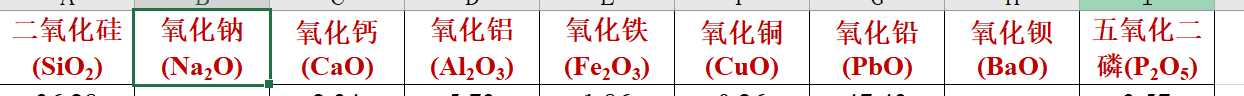

In [51]:
data_type_1.index = np.arange(0,26)
data_type_1

,类型,表面风化,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,1,2,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.00,0.00
1,1,1,8,20.14,0.00,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.00,2.58
2,1,1,8,4.61,0.00,0.00,3.19,0.00,1.11,0.00,3.14,32.45,30.62,7.56,0.53,0.00,15.03
3,1,1,11,33.59,0.00,0.21,3.51,0.71,2.69,0.00,4.93,25.39,14.61,9.38,0.37,0.00,0.00
4,1,1,19,29.64,0.00,0.00,2.93,0.59,3.57,1.33,3.51,42.82,5.35,8.83,0.19,0.00,0.00
5,1,1,26,19.79,0.00,0.00,1.44,0.00,0.70,0.00,10.57,29.53,32.25,3.13,0.45,0.00,1.96
6,1,1,26,3.72,0.00,0.40,3.01,0.00,1.18,0.00,3.60,29.92,35.45,6.04,0.62,0.00,15.95
7,1,1,34,35.78,0.00,0.25,0.78,0.00,1.62,0.47,1.51,46.55,10.00,0.34,0.22,0.00,0.00
8,1,1,36,39.57,2.22,0.14,0.37,0.00,1.60,0.32,0.68,41.61,10.83,0.07,0.22,0.00,0.00
9,1,1,38,32.93,1.38,0.00,0.68,0.00,2.57,0.29,0.73,49.31,9.79,0.48,0.41,0.00,0.00


要去除严重风化点，反正严重风化的都是有对应的 :)

In [53]:
data_type_1 = data_type_1.drop(data_type_1.index[[2,6,22]])
data_type_1.index = np.arange(23)
data_type_1

,类型,表面风化,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,1,1,2,36.28,0.00,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.00,0.00
1,1,1,8,20.14,0.00,0.00,1.48,0.00,1.34,0.00,10.41,28.68,31.23,3.59,0.37,0.00,2.58
2,1,1,11,33.59,0.00,0.21,3.51,0.71,2.69,0.00,4.93,25.39,14.61,9.38,0.37,0.00,0.00
3,1,1,19,29.64,0.00,0.00,2.93,0.59,3.57,1.33,3.51,42.82,5.35,8.83,0.19,0.00,0.00
4,1,1,26,19.79,0.00,0.00,1.44,0.00,0.70,0.00,10.57,29.53,32.25,3.13,0.45,0.00,1.96
5,1,1,34,35.78,0.00,0.25,0.78,0.00,1.62,0.47,1.51,46.55,10.00,0.34,0.22,0.00,0.00
6,1,1,36,39.57,2.22,0.14,0.37,0.00,1.60,0.32,0.68,41.61,10.83,0.07,0.22,0.00,0.00
7,1,1,38,32.93,1.38,0.00,0.68,0.00,2.57,0.29,0.73,49.31,9.79,0.48,0.41,0.00,0.00
8,1,1,39,26.25,0.00,0.00,1.11,0.00,0.50,0.00,0.88,61.03,7.22,1.16,0.61,0.00,0.00
9,1,1,40,16.71,0.00,0.00,1.87,0.00,0.45,0.19,0.00,70.21,6.69,1.77,0.68,0.00,0.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


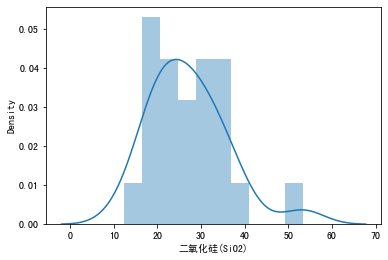

In [54]:
fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')
sns.distplot(data_type_1['二氧化硅(SiO2)'], bins = 10) # 铅钡风化

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


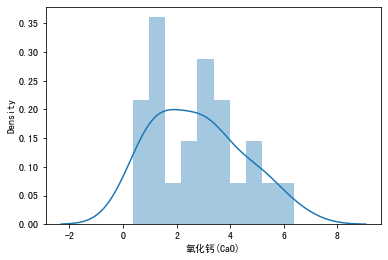

In [55]:
sns.distplot(data_type_1['氧化钙(CaO)'], bins = 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


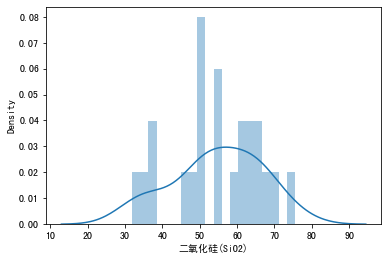

In [56]:
sns.distplot(data_type_2['二氧化硅(SiO2)'], bins = 20) # 铅钡未风化

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


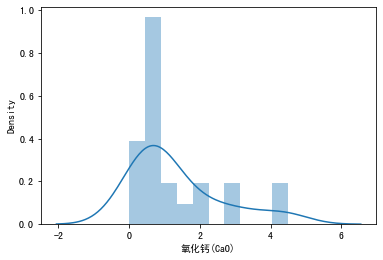

In [57]:
sns.distplot(data_type_2['氧化钙(CaO)'], bins = 10)

现在来用四分位点划分区间，然后对应均值作为比例进行映射：

In [58]:
res1 = np.percentile(data_type_1['二氧化硅(SiO2)'], (25, 50, 75), interpolation='midpoint')
print(res1)

[20.745 25.74  31.66 ]


In [59]:
data_type_1[data_type_1['二氧化硅(SiO2)'] <= res1[0] ]['二氧化硅(SiO2)'].index

Int64Index([1, 4, 9, 10, 11, 15], dtype='int64')

In [60]:
res2 = np.percentile(data_type_2['二氧化硅(SiO2)'], (25, 50, 75), interpolation='midpoint')
print(res2)

[49.81 54.61 63.48]


In [61]:
columns = ['二氧化硅(SiO2)','氧化钠(Na2O)','氧化钙(CaO)','氧化镁(MgO)','氧化铝(Al2O3)','氧化铁(Fe2O3)','氧化铜(CuO)','氧化铅(PbO)','氧化钡(BaO)','五氧化二磷(P2O5)','氧化锶(SrO)','氧化锡(SnO2)']
# columns = ['二氧化硅(SiO2)']

arr = np.zeros((23,len(columns)))
transformed_data = pd.DataFrame(arr, columns = columns)
transformed_data['编号'] = data_type_1['编号'].values
transformed_data

,二氧化硅(SiO2),氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),编号
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40


In [62]:

for i, column in enumerate(columns):
  res1 = np.percentile(data_type_1[column], (25, 50, 75), interpolation='midpoint')
  res2 = np.percentile(data_type_2[column], (25, 50, 75), interpolation='midpoint')

  ratioed_data1 = (data_type_2[data_type_2[column] <= res2[0] ][column].values.mean()) / ( data_type_1[data_type_1[column] <= res1[0] ][column].values.mean()) * data_type_1[data_type_1[column] <= res1[0] ][column].values
  ratioed_data2 = (data_type_2[ (res2[0] < data_type_2[column]) & (data_type_2[column] <= res2[1]) ][column].values.mean()) / ( data_type_1[ (res1[0] < data_type_1[column] ) & (data_type_1[column] <= res1[1]) ][column].values.mean()) * data_type_1[ (res1[0] < data_type_1[column] ) & (data_type_1[column] <= res1[1]) ][column].values
  ratioed_data3 = (data_type_2[ (res2[1] < data_type_2[column]) & (data_type_2[column] <= res2[2]) ][column].values.mean()) / ( data_type_1[ (res1[1] < data_type_1[column] ) & (data_type_1[column] <= res1[2]) ][column].values.mean()) * data_type_1[ (res1[1] < data_type_1[column] ) & (data_type_1[column] <= res1[2]) ][column].values
  ratioed_data4 = (data_type_2[data_type_2[column] > res2[2] ][column].values.mean()) / ( data_type_1[data_type_1[column] > res1[2] ][column].values.mean()) * data_type_1[data_type_1[column] > res1[2] ][column].values

  # 进行编号的对齐
  transformed_data.iloc[ data_type_1[data_type_1[column] <= res1[0] ].index ,i] = ratioed_data1
  transformed_data.iloc[ data_type_1[ (res1[0] < data_type_1[column] ) & (data_type_1[column] <= res1[1]) ].index, i] = ratioed_data2
  transformed_data.iloc[data_type_1[ (res1[1] < data_type_1[column] ) & (data_type_1[column] <= res1[2]) ].index, i]  = ratioed_data3
  transformed_data.iloc[data_type_1[data_type_1[column] > res1[2] ].index, i] = ratioed_data4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys


In [63]:
transformed_data

,二氧化硅(SiO2),氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),编号
0,64.068336,NaN,0.800426,1.203496,7.699735,2.488427,0.123491,24.120078,0.000000,0.183484,0.000000,NaN,2
1,44.789497,NaN,0.506252,NaN,2.365391,NaN,6.765127,13.445617,23.464959,0.184511,0.245525,NaN,8
2,59.317955,NaN,1.254647,0.724137,3.986469,NaN,3.203850,11.903215,10.977363,3.273914,0.245525,NaN,11
3,61.789391,NaN,1.047327,0.651382,4.797217,1.779359,2.281037,18.168666,5.527500,3.081947,0.000000,NaN,19
4,44.011129,NaN,0.492570,NaN,1.235652,NaN,6.869106,13.844110,24.231346,0.160869,0.302000,NaN,26
5,63.185365,NaN,0.187143,NaN,2.459023,0.419548,0.947141,23.672562,10.192620,0.000000,0.000000,NaN,34
6,69.878281,7.926690,0.088773,NaN,2.824348,NaN,0.322978,17.655259,11.038607,0.000000,0.000000,NaN,36
7,58.152434,4.927402,0.163150,NaN,3.808634,NaN,0.470771,28.621671,9.978575,0.000000,0.275156,NaN,38
8,54.722386,NaN,0.266319,NaN,0.882609,NaN,0.567504,35.424470,6.508552,0.059619,0.493684,NaN,39
9,37.161494,NaN,0.639656,NaN,0.794348,NaN,0.000000,40.752942,6.911958,0.090971,0.550336,NaN,40


In [64]:
transformed_data = transformed_data.fillna(0)
# transformed_data = transformed_data.drop(['氧化镁(MgO)','氧化铁(Fe2O3)','氧化钡(BaO)','氧化锡(SnO2)'], axis = 1)
transformed_data

,二氧化硅(SiO2),氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),编号
0,64.068336,0.000000,0.800426,1.203496,7.699735,2.488427,0.123491,24.120078,0.000000,0.183484,0.000000,0.000000,2
1,44.789497,0.000000,0.506252,0.000000,2.365391,0.000000,6.765127,13.445617,23.464959,0.184511,0.245525,0.000000,8
2,59.317955,0.000000,1.254647,0.724137,3.986469,0.000000,3.203850,11.903215,10.977363,3.273914,0.245525,0.000000,11
3,61.789391,0.000000,1.047327,0.651382,4.797217,1.779359,2.281037,18.168666,5.527500,3.081947,0.000000,0.000000,19
4,44.011129,0.000000,0.492570,0.000000,1.235652,0.000000,6.869106,13.844110,24.231346,0.160869,0.302000,0.000000,26
5,63.185365,0.000000,0.187143,0.000000,2.459023,0.419548,0.947141,23.672562,10.192620,0.000000,0.000000,0.000000,34
6,69.878281,7.926690,0.088773,0.000000,2.824348,0.000000,0.322978,17.655259,11.038607,0.000000,0.000000,0.000000,36
7,58.152434,4.927402,0.163150,0.000000,3.808634,0.000000,0.470771,28.621671,9.978575,0.000000,0.275156,0.000000,38
8,54.722386,0.000000,0.266319,0.000000,0.882609,0.000000,0.567504,35.424470,6.508552,0.059619,0.493684,0.000000,39
9,37.161494,0.000000,0.639656,0.000000,0.794348,0.000000,0.000000,40.752942,6.911958,0.090971,0.550336,0.000000,40


In [69]:
data_type_2.drop(['类型','表面风化'], axis = 1).to_excel('data_type_2.xlsx')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


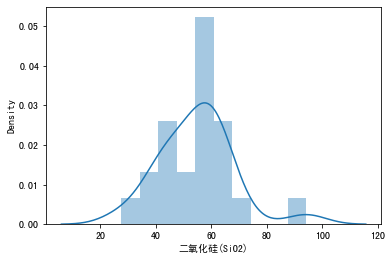

In [66]:
sns.distplot(transformed_data['二氧化硅(SiO2)'], bins = 10) # 铅钡风化

In [67]:
transformed_data.to_excel('qbtransformed.xlsx')

对钾的处理稍微特殊一点,因为风化后的钾和镁其实有些都是0,所以用不了上面的映射方法,只能进行随机采样,用风化前分布进行预测:

In [122]:
data_type_3.index = np.arange(0,6)
data_type_3

,类型,表面风化,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,0,1,7,92.63,0.0,0.00,1.07,0.00,1.98,0.17,3.24,0.0,0.0,0.61,0.0,0.0,0.0
1,0,1,9,95.02,0.0,0.59,0.62,0.00,1.32,0.32,1.55,0.0,0.0,0.35,0.0,0.0,0.0
2,0,1,10,96.77,0.0,0.92,0.21,0.00,0.81,0.26,0.84,0.0,0.0,0.00,0.0,0.0,0.0
3,0,1,12,94.29,0.0,1.01,0.72,0.00,1.46,0.29,1.65,0.0,0.0,0.15,0.0,0.0,0.0
4,0,1,22,92.35,0.0,0.74,1.66,0.64,3.50,0.35,0.55,0.0,0.0,0.21,0.0,0.0,0.0
5,0,1,27,92.72,0.0,0.00,0.94,0.54,2.51,0.20,1.54,0.0,0.0,0.36,0.0,0.0,0.0


In [123]:
columns = ['二氧化硅(SiO2)','氧化钠(Na2O)','氧化钙(CaO)','氧化镁(MgO)','氧化铝(Al2O3)','氧化铁(Fe2O3)','氧化铜(CuO)','五氧化二磷(P2O5)','氧化锶(SrO)','氧化锡(SnO2)','氧化钾(K2O)']
# columns = ['二氧化硅(SiO2)']

arr = np.zeros((6,len(columns)))
transformed_data_kk = pd.DataFrame(arr, columns = columns)
transformed_data_kk['编号'] = data_type_3['编号'].values
transformed_data_kk

,二氧化硅(SiO2),氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),氧化钾(K2O),编号
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27


In [124]:
for i, column in enumerate(columns):
  res1 = np.percentile(data_type_3[column], (25, 50, 75), interpolation='midpoint')
  res2 = np.percentile(data_type_4[column], (25, 50, 75), interpolation='midpoint')

  ratioed_data1 = (data_type_4[data_type_4[column] <= res2[0] ][column].values.mean()) / ( data_type_3[data_type_3[column] <= res1[0] ][column].values.mean()) * data_type_3[data_type_3[column] <= res1[0] ][column].values
  ratioed_data2 = (data_type_4[ (res2[0] < data_type_4[column]) & (data_type_4[column] <= res2[1]) ][column].values.mean()) / ( data_type_3[ (res1[0] < data_type_3[column] ) & (data_type_3[column] <= res1[1]) ][column].values.mean()) * data_type_3[ (res1[0] < data_type_3[column] ) & (data_type_3[column] <= res1[1]) ][column].values
  ratioed_data3 = (data_type_4[ (res2[1] < data_type_4[column]) & (data_type_4[column] <= res2[2]) ][column].values.mean()) / ( data_type_3[ (res1[1] < data_type_3[column] ) & (data_type_3[column] <= res1[2]) ][column].values.mean()) * data_type_3[ (res1[1] < data_type_3[column] ) & (data_type_3[column] <= res1[2]) ][column].values
  ratioed_data4 = (data_type_4[data_type_4[column] > res2[2] ][column].values.mean()) / ( data_type_3[data_type_3[column] > res1[2] ][column].values.mean()) * data_type_3[data_type_3[column] > res1[2] ][column].values

  # 进行编号的对齐
  transformed_data_kk.iloc[ data_type_3[data_type_3[column] <= res1[0] ].index ,i] = ratioed_data1
  transformed_data_kk.iloc[ data_type_3[ (res1[0] < data_type_3[column] ) & (data_type_3[column] <= res1[1]) ].index, i] = ratioed_data2
  transformed_data_kk.iloc[data_type_3[ (res1[1] < data_type_3[column] ) & (data_type_3[column] <= res1[2]) ].index, i]  = ratioed_data3
  transformed_data_kk.iloc[data_type_3[data_type_3[column] > res1[2] ].index, i] = ratioed_data4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [125]:
transformed_data_kk = transformed_data_kk.fillna(0)
transformed_data_kk

,二氧化硅(SiO2),氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),氧化钾(K2O),编号
0,60.224356,0.0,6.584615,0.000000,6.710000,0.128649,6.047117,4.209210,0.0,0.0,0.000000,7
1,80.323666,0.0,1.000964,0.000000,4.561127,3.674428,3.020000,1.180000,0.0,0.0,8.923333,9
2,81.803001,0.0,0.339036,0.000000,2.798873,1.433333,0.503597,0.000000,0.0,0.0,12.527254,10
3,67.620000,0.0,5.330000,0.000000,5.946667,2.306667,3.079550,0.546667,0.0,0.0,13.752746,12
4,60.042311,0.0,10.215385,1.981469,11.814199,4.018905,0.329736,0.810000,0.0,0.0,11.073333,22
5,63.120000,0.0,6.930000,1.671864,8.472468,0.151351,1.810000,2.484124,0.0,0.0,0.000000,27


接下来是对镁和钾的随机采样:

In [126]:
data_type_4['氧化镁(MgO)'].mean()

1.0791666666666666

In [130]:
import random
Mg_noise = []
K_noise = []

Mg_sample = random.sample(list(data_type_4['氧化镁(MgO)'].values),6)
K_sample = random.sample(list(data_type_4['氧化钾(K2O)'].values),6)


for i in range(6):
  a=np.random.normal(loc=0, scale=data_type_4['氧化镁(MgO)'].std(), size=None)
  Mg_noise.append(a)

for i in range(6):
  a=np.random.normal(loc=0, scale=data_type_4['氧化钾(K2O)'].std(), size=None)
  K_noise.append(a)

In [131]:
transformed_data_kk['氧化镁(MgO)']  = np.array(Mg_noise) + np.array(Mg_sample)
transformed_data_kk['氧化钾(K2O)']  = np.array(K_noise)  + np.array(K_sample)

In [132]:
transformed_data_kk

,二氧化硅(SiO2),氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),氧化钾(K2O),编号
0,60.224356,0.0,6.584615,0.600543,6.710000,0.128649,6.047117,4.209210,0.0,0.0,10.191085,7
1,80.323666,0.0,1.000964,1.601956,4.561127,3.674428,3.020000,1.180000,0.0,0.0,9.637648,9
2,81.803001,0.0,0.339036,3.311048,2.798873,1.433333,0.503597,0.000000,0.0,0.0,6.845633,10
3,67.620000,0.0,5.330000,1.550735,5.946667,2.306667,3.079550,0.546667,0.0,0.0,15.638034,12
4,60.042311,0.0,10.215385,1.050703,11.814199,4.018905,0.329736,0.810000,0.0,0.0,-6.238756,22
5,63.120000,0.0,6.930000,1.808285,8.472468,0.151351,1.810000,2.484124,0.0,0.0,8.316651,27


In [474]:
transformed_data_kk.to_excel('k_transfromed.xlsx')

## 数据的探索
- 分布/groupby分布

In [ ]:
pure_data = data_p3.drop(['类型','表面风化'], axis = 1)
types = []
for i in range(len(data_p3['类型'])):
  if data_p3['类型'][i] == 1 and data_p3['表面风化'][i] == 1:
    types.append(1)
  elif data_p3['类型'][i] == 1 and data_p3['表面风化'][i] == 0:
    types.append(2)
  elif data_p3['类型'][i] == 0 and data_p3['表面风化'][i] == 1:
    types.append(3)
  elif data_p3['类型'][i] == 0 and data_p3['表面风化'][i] == 0:
    types.append(4)
pure_data['四个种类'] = types


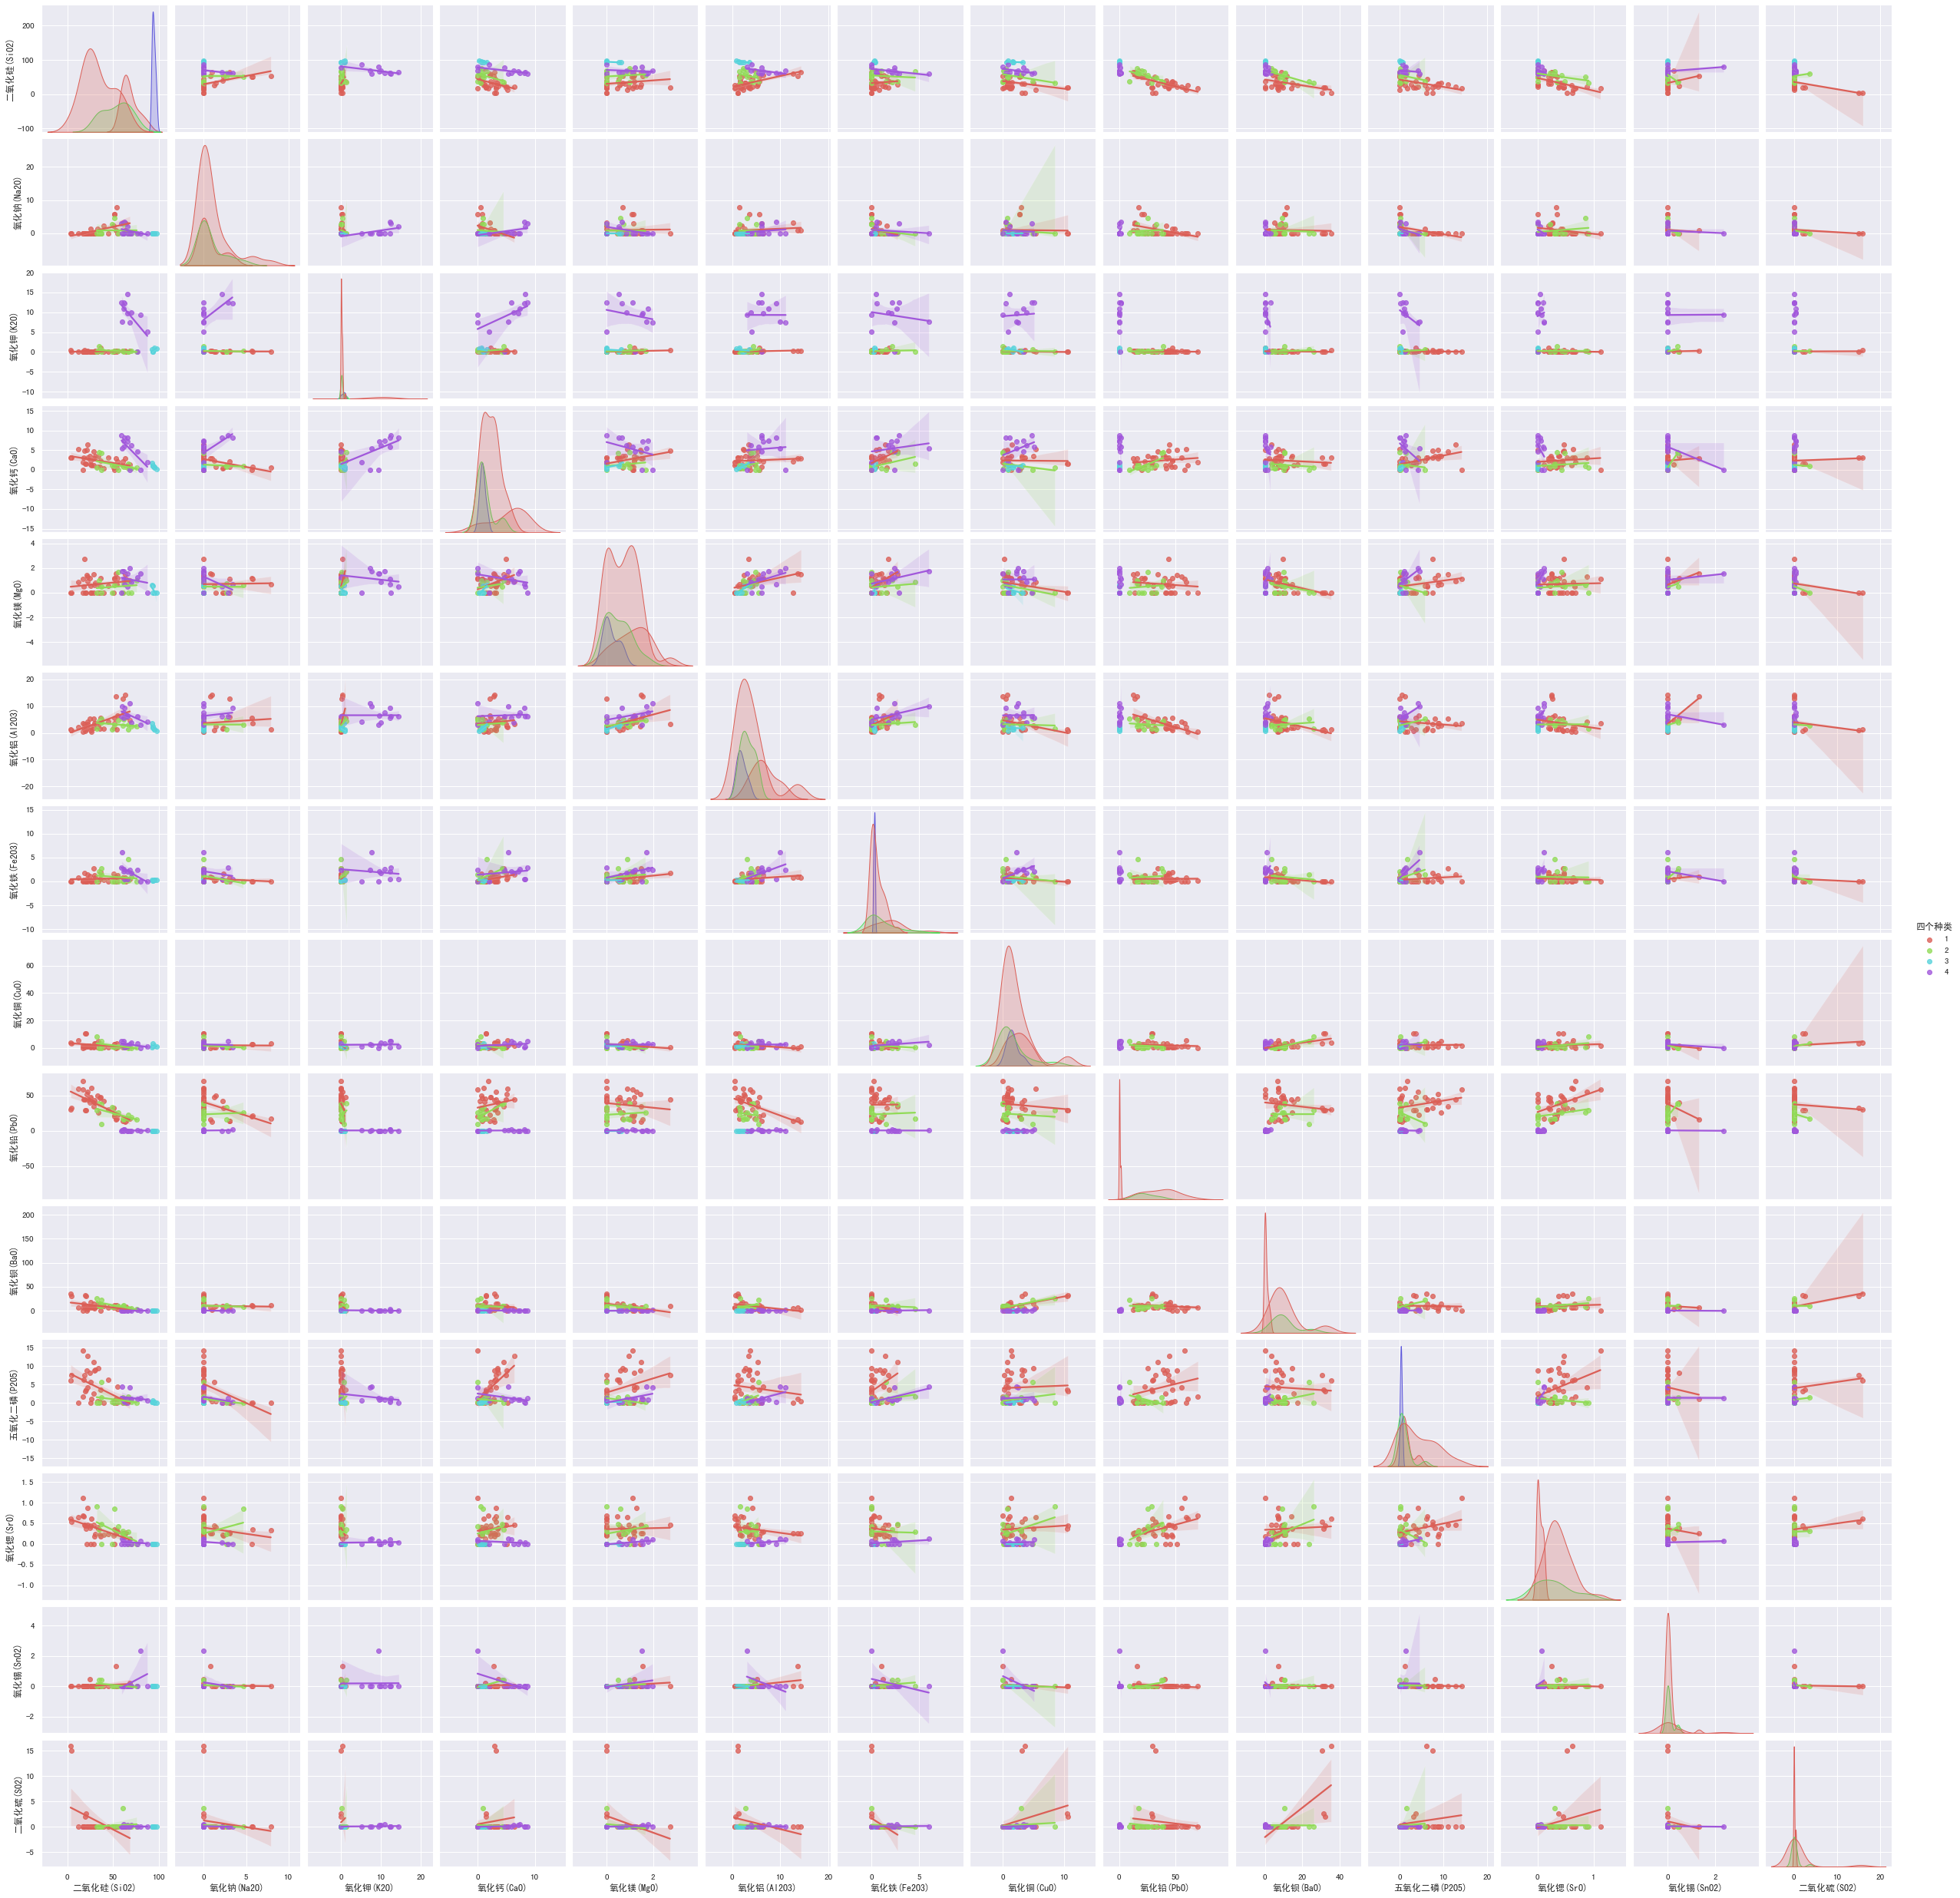

In [ ]:
sns.pairplot(pure_data
             ,kind="reg" # 回归线
             ,diag_kind="kde" # 对角分布
             ,hue="四个种类" 
             ,palette='hls',
            )

二氧化硅(SiO2)         AxesSubplot(0.125,0.71587;0.168478x0.16413)
氧化钠(Na2O)       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
氧化钾(K2O)        AxesSubplot(0.529348,0.71587;0.168478x0.16413)
氧化钙(CaO)        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
氧化镁(MgO)          AxesSubplot(0.125,0.518913;0.168478x0.16413)
氧化铝(Al2O3)     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
氧化铁(Fe2O3)     AxesSubplot(0.529348,0.518913;0.168478x0.16413)
氧化铜(CuO)       AxesSubplot(0.731522,0.518913;0.168478x0.16413)
氧化铅(PbO)          AxesSubplot(0.125,0.321957;0.168478x0.16413)
氧化钡(BaO)       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
五氧化二磷(P2O5)    AxesSubplot(0.529348,0.321957;0.168478x0.16413)
氧化锶(SrO)       AxesSubplot(0.731522,0.321957;0.168478x0.16413)
氧化锡(SnO2)            AxesSubplot(0.125,0.125;0.168478x0.16413)
二氧化硫(SO2)         AxesSubplot(0.327174,0.125;0.168478x0.16413)
四个种类              AxesSubplot(0.529348,0.125;0.168478x0.16413)
dtype: object

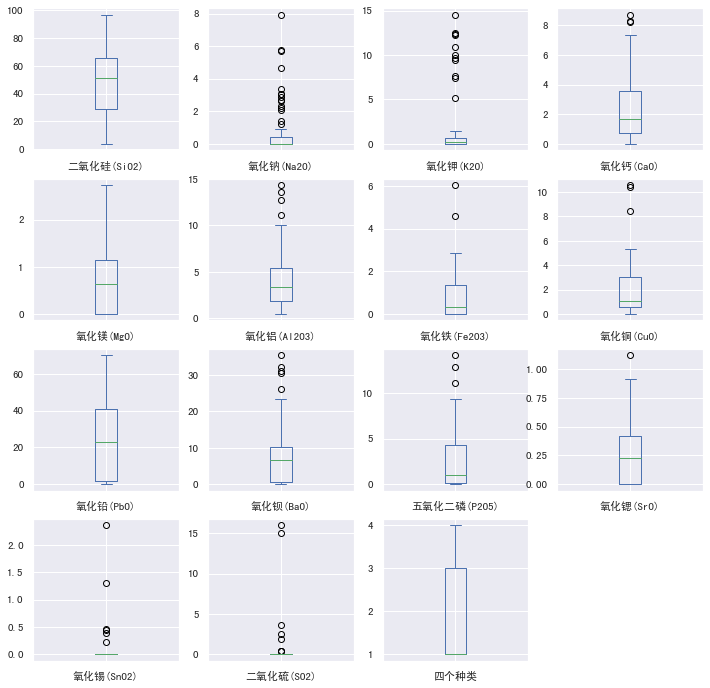

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  
sns.set(rc={'figure.figsize': (12, 12)})  # 设置画板大小

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')

pure_data.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd304475fd0>,
      dtype=object)

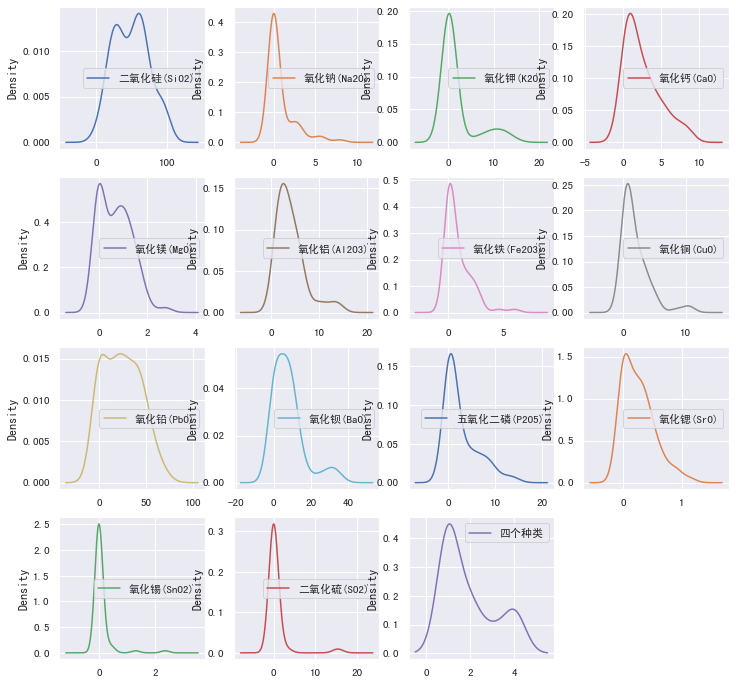

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  
sns.set(rc={'figure.figsize': (12, 12)})  # 设置画板大小

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')
pure_data.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

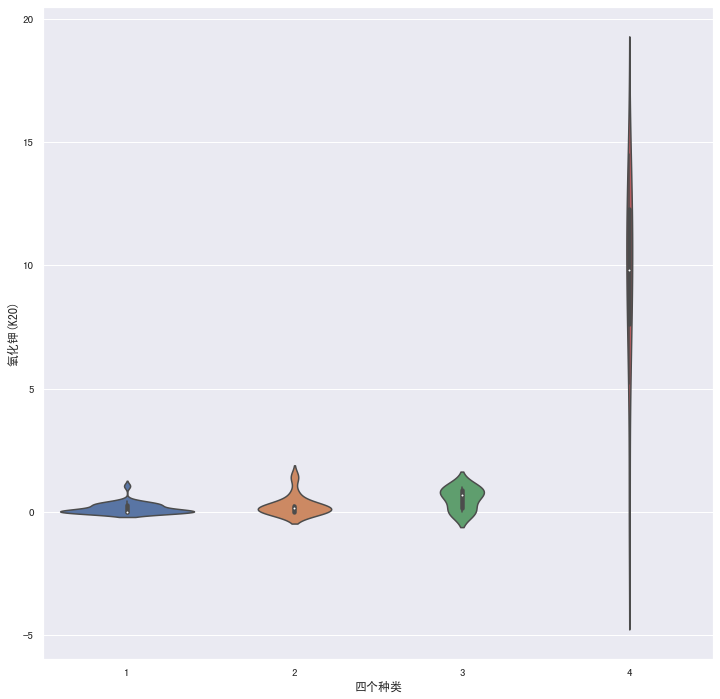

In [ ]:
sns.violinplot( x=pure_data["四个种类"], y=pure_data["氧化钾(K2O)"])

In [ ]:
def plot_con_cat(df,j,cols=None):
    if cols == None:
        n = np.ceil(len(df.columns))
        data = df.copy()
        cols = df.columns.tolist()
    else:
        n = np.ceil(len(cols))
        data = df.loc[:,cols]
    
    
    plt.figure(figsize=(10,6),dpi=200)
    colors = ['#0f4c81',"#3f64a5"]
    species = ['高钾玻璃','铅钡玻璃']
    alphas = [1,0.5]
    
    ax1 = plt.subplot()
    for i in range(len(df['类型'].unique())):
        sns.kdeplot(df[df['类型'] == i][cols[j]], color=colors[i], shade=True, label=species[i],alpha=alphas[i]) 
    
    plt.legend()
    ax1.set_ylabel('')
    
    ax1.set_ylabel('')
    ax1.grid(which='both', axis='y', zorder=0, color='black', linestyle=':', dashes=(2,7))
    for direction in ['top','right','left']:
        ax1.spines[direction].set_visible(False)

    plt.legend()
    plt.show()


data = pd.read_excel('3problem.xlsx')
index = range(2,len(data.columns))
for j in index:
    plot_con_cat(data, j)

## 第二问


根据查的一些资料可以发现，其实对于种类的划分都是利用未风化区域进行的，所以在这里利用第一问得到结果，然后对于同一样本不同风化部位直接取平均，最终得到的是58条未风化的数据，然后分成铅钡和钾两种玻璃类型，去聚类得到亚类。



首先来得到钾玻璃的数据：

### 钾玻璃

这里挑了一下元素，把不显著变化的去掉了，比如Sn去掉了，Sn这个只有一个点有，会影响聚类的效果，所以删掉。还有对于钾玻璃来说，铅钡的含量是不会影响后续亚类的划分的，所以也删掉。

首先是要去重的,对于3号和6号,要取个均值填进去:

In [195]:
kk_pre = data_type_4.drop(['类型','表面风化','二氧化硫(SO2)','氧化铅(PbO)','氧化钡(BaO)'], axis = 1)

In [196]:
kk_pre.index = np.arange(12)

In [197]:
kk_pre

,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2)
0,1,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,1.17,0.00,0.00
1,3,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.66,0.00,0.00
2,3,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,0.70,0.10,0.00
3,4,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.79,0.00,0.00
4,5,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.94,0.06,0.00
5,6,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,4.18,0.11,0.00
6,6,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,4.50,0.12,0.00
7,13,59.01,2.86,12.53,8.70,0.00,6.16,2.88,4.73,1.27,0.00,0.00
8,14,62.47,3.38,12.28,8.23,0.66,9.23,0.50,0.47,0.16,0.00,0.00
9,16,65.18,2.10,14.52,8.27,0.52,6.18,0.42,1.07,0.00,0.04,0.00


In [198]:
kk_pre.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [199]:
kk_pre[kk_pre['编号'] == 3].mean().values

array([3.000e+00, 7.438e+01, 0.000e+00, 8.780e+00, 3.940e+00, 5.550e-01,
       4.780e+00, 1.080e+00, 2.935e+00, 6.800e-01, 5.000e-02, 0.000e+00])

In [200]:
kk_pre = kk_pre.drop(kk_pre.index[[1,2]])
kk_pre.index = np.arange(10)

In [201]:
kk_pre.loc[len(kk_pre.index)] = [3, 7.438e+01, 0,8.780e+00, 3.940e+00, 5.550e-01,
       4.780e+00, 1.080e+00, 2.935e+00, 6.800e-01, 5.000e-02,0]

In [202]:
kk_pre.index = np.arange(11)
kk_pre

,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2)
0,1.0,69.33,0.00,9.99,6.32,0.870,3.93,1.74,3.870,1.17,0.00,0.00
1,4.0,65.88,0.00,9.67,7.12,1.560,6.44,2.06,2.180,0.79,0.00,0.00
2,5.0,61.58,0.00,10.95,7.35,1.770,7.50,2.62,3.270,0.94,0.06,0.00
3,6.0,67.65,0.00,7.37,0.00,1.980,11.15,2.39,2.510,4.18,0.11,0.00
4,6.0,59.81,0.00,7.68,5.41,1.730,10.05,6.04,2.180,4.50,0.12,0.00
5,13.0,59.01,2.86,12.53,8.70,0.000,6.16,2.88,4.730,1.27,0.00,0.00
6,14.0,62.47,3.38,12.28,8.23,0.660,9.23,0.50,0.470,0.16,0.00,0.00
7,16.0,65.18,2.10,14.52,8.27,0.520,6.18,0.42,1.070,0.00,0.04,0.00
8,18.0,79.46,0.00,9.42,0.00,1.530,3.05,0.00,0.000,1.36,0.07,2.36
9,21.0,76.68,0.00,0.00,4.71,1.220,6.19,2.37,3.280,1.10,0.00,0.00


接下来是对6号进行取平均:

In [203]:
kk_pre[kk_pre['编号'] == 6].mean().values

array([ 6.   , 63.73 ,  0.   ,  7.525,  2.705,  1.855, 10.6  ,  4.215,
        2.345,  4.34 ,  0.115,  0.   ])

In [204]:
kk_pre = kk_pre.drop(kk_pre.index[[3,4]])

In [205]:
kk_pre.index = np.arange(9)

In [206]:
kk_pre.loc[len(kk_pre.index)] = [6, 63.73  ,0,  7.525,  2.705,  1.855, 10.6  ,  4.215,
        2.345,  4.34 ,  0.115,0]

In [207]:
kk_pre.index = np.arange(10)
kk_pre

,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2)
0,1.0,69.33,0.00,9.990,6.320,0.870,3.93,1.740,3.870,1.17,0.000,0.00
1,4.0,65.88,0.00,9.670,7.120,1.560,6.44,2.060,2.180,0.79,0.000,0.00
2,5.0,61.58,0.00,10.950,7.350,1.770,7.50,2.620,3.270,0.94,0.060,0.00
3,13.0,59.01,2.86,12.530,8.700,0.000,6.16,2.880,4.730,1.27,0.000,0.00
4,14.0,62.47,3.38,12.280,8.230,0.660,9.23,0.500,0.470,0.16,0.000,0.00
5,16.0,65.18,2.10,14.520,8.270,0.520,6.18,0.420,1.070,0.00,0.040,0.00
6,18.0,79.46,0.00,9.420,0.000,1.530,3.05,0.000,0.000,1.36,0.070,2.36
7,21.0,76.68,0.00,0.000,4.710,1.220,6.19,2.370,3.280,1.10,0.000,0.00
8,3.0,74.38,0.00,8.780,3.940,0.555,4.78,1.080,2.935,0.68,0.050,0.00
9,6.0,63.73,0.00,7.525,2.705,1.855,10.60,4.215,2.345,4.34,0.115,0.00


In [209]:
kk = pd.concat([transformed_data_kk,kk_pre], axis = 0)
kk

,二氧化硅(SiO2),氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),氧化钾(K2O),编号
0,60.224356,0.00,6.584615,0.600543,6.710000,0.128649,6.047117,4.209210,0.000,0.00,10.191085,7.0
1,80.323666,0.00,1.000964,1.601956,4.561127,3.674428,3.020000,1.180000,0.000,0.00,9.637648,9.0
2,81.803001,0.00,0.339036,3.311048,2.798873,1.433333,0.503597,0.000000,0.000,0.00,6.845633,10.0
3,67.620000,0.00,5.330000,1.550735,5.946667,2.306667,3.079550,0.546667,0.000,0.00,15.638034,12.0
4,60.042311,0.00,10.215385,1.050703,11.814199,4.018905,0.329736,0.810000,0.000,0.00,-6.238756,22.0
5,63.120000,0.00,6.930000,1.808285,8.472468,0.151351,1.810000,2.484124,0.000,0.00,8.316651,27.0
0,69.330000,0.00,6.320000,0.870000,3.930000,1.740000,3.870000,1.170000,0.000,0.00,9.990000,1.0
1,65.880000,0.00,7.120000,1.560000,6.440000,2.060000,2.180000,0.790000,0.000,0.00,9.670000,4.0
2,61.580000,0.00,7.350000,1.770000,7.500000,2.620000,3.270000,0.940000,0.060,0.00,10.950000,5.0
3,59.010000,2.86,8.700000,0.000000,6.160000,2.880000,4.730000,1.270000,0.000,0.00,12.530000,13.0


In [210]:
# 先取出来每类数据，然后PCA+聚类
# group = data_p3.groupby("类型")
kk_cluster = kk.drop(['氧化锡(SnO2)'], axis = 1)
# kk_cluster = kk_pre.drop(['氧化锡(SnO2)'], axis = 1)

钾玻璃是印度、东南亚以及我国华南和西南等地特有的一种古代玻璃体系，以氧化钾(K20)为主要助熔剂。从目前材料来看，我国的钾玻璃主要出现于战国中晚期至东汉时期，集中在西南和华南地区的广西、广东、贵州、云南、四川等地，在新疆、云南、江苏、湖南、甘肃和青海等地亦有少量出土，其中以两广地区出土的数量最多，种类也最为丰富。钾玻璃依照其中氧化钙(Ca0)和氧化铝(AI203
)含量的多少，又可以划分为低铝、低钙和中等钙铝等 3 个亚类。

根据参考的文献，先大致分成3类，对应的大体是中等钙铝(m-K-Ca-Al)、低钙(m-K-Al)和低铝(m-K-Ca)3亚类，然后再去细分每个亚类里面含量的区别变化。低钙就是Al正常，Ca偏低的情况。



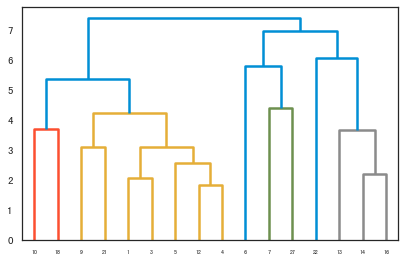

In [211]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Remove the grain species from the DataFrame, save for later
varieties = list([7,
9,
10,
12,
22,
27,
1,
4,
5,
13,
14,
16,
	18,
	21,
  3,
  6])


# varieties = list([
# 1,
# 4,
# 5,
# 13,
# 14,
# 16,
# 	18,
# 	21,
#   3,
#   6])


# Extract the measurements as a NumPy array

sc = StandardScaler()
norm_kk = sc.fit_transform(kk_cluster)

samples = norm_kk

"""
Perform hierarchical clustering on samples using the
linkage() function with the method='complete' keyword argument.
Assign the result to mergings.
"""
mergings = linkage(samples, method='complete')

"""
Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.
"""
dendrogram(mergings,
 labels=varieties,
 leaf_font_size=6,
 )

plt.show()

In [212]:
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
norm = sc.fit_transform(kk_cluster)

model = PCA().fit(norm) # 构造并拟合模型
print('特征值是：\n', model.explained_variance_)
print('各主成分贡献率：\n', model.explained_variance_ratio_)
model.explained_variance_ratio_[0:5].sum()

特征值是：
 [3.39950677 2.29512314 2.15568678 1.29402748 1.05123194 0.62924824
 0.47834889 0.24694491 0.11183812 0.06033489 0.01104217]
各主成分贡献率：
 [0.28973069 0.19560709 0.18372331 0.11028643 0.08959363 0.05362911
 0.04076837 0.02104644 0.00953166 0.00514218 0.00094109]


0.8689411467694884

In [213]:
model.components_

array([[ 0.5137875 , -0.32391296, -0.51725765,  0.39975713, -0.38942403,
        -0.03525714, -0.14724945, -0.08010952,  0.10943102, -0.00998055,
        -0.10330889],
       [-0.08426137, -0.34158268, -0.01752473,  0.2537766 ,  0.43503576,
         0.41634866, -0.14262476,  0.28457956,  0.199356  , -0.52341184,
         0.18406299],
       [-0.12631405, -0.21209478, -0.11070004, -0.09131527, -0.04876957,
         0.14473052,  0.53820343,  0.47693369,  0.2693127 ,  0.23150934,
        -0.50188406],
       [-0.11710126,  0.26297481, -0.14175053,  0.04486856,  0.18204228,
        -0.25464629, -0.42145746,  0.15696623,  0.70114538,  0.31381025,
         0.06851651],
       [-0.01945015, -0.22787815, -0.06462497, -0.02045605, -0.05452515,
        -0.62842326,  0.16675134,  0.50493127, -0.17194584, -0.06957302,
         0.47753769],
       [ 0.35458438,  0.21149475, -0.21783575, -0.69098686, -0.15714974,
         0.15086275,  0.10563609,  0.04960495,  0.27212872, -0.36392122,
         0.192

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


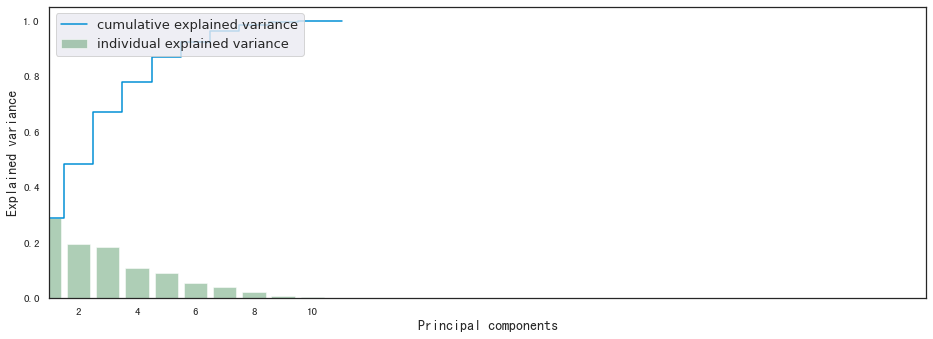

In [214]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)

# 注意！下面的norm应该是shape[1]，这里用0是因为特征数大于样本数的情况
plt.step(range(norm.shape[1]), model.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,norm.shape[1]+1), model.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 30)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

In [215]:
X_reduced= PCA(n_components=5).fit_transform(norm) # model.components_是系数

In [216]:
# X_reduced = norm

明显看出肘部位置是在聚类数为5的时候：

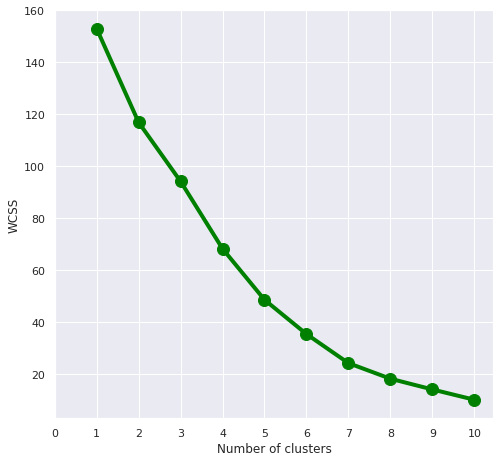

In [217]:
# find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X_reduced)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [218]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4, init = 'k-means++').fit(X_reduced)
labels = model.labels_
labels

array([0, 2, 2, 0, 3, 3, 0, 0, 0, 1, 1, 1, 2, 3, 0, 0], dtype=int32)

In [219]:

def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  


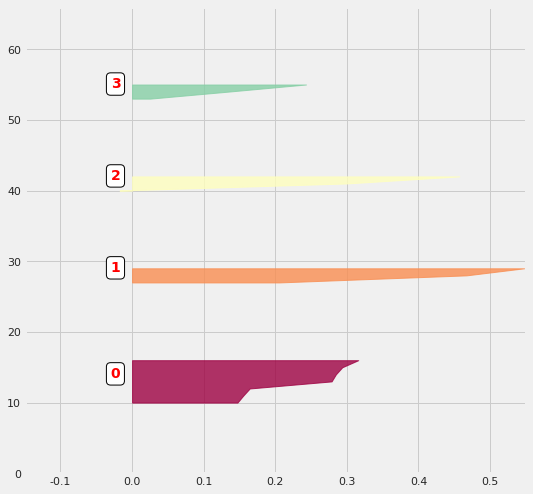

In [220]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

scaled_matrix = X_reduced
clusters_clients = labels
n_clusters = 4

sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)


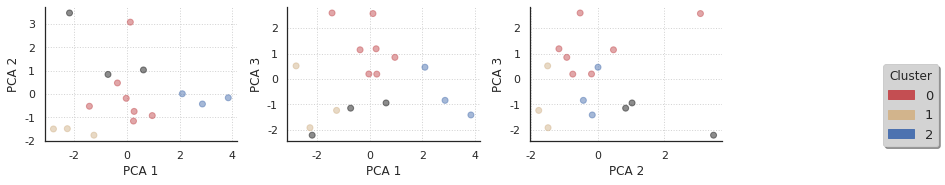

In [221]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

mat = pd.DataFrame(X_reduced)

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in labels]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(3):
    for iy in range(ix+1, 3):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break

#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(3):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

In [222]:
data_type_3

,类型,表面风化,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,0,1,7,92.63,0.0,0.00,1.07,0.00,1.98,0.17,3.24,0.0,0.0,0.61,0.0,0.0,0.0
1,0,1,9,95.02,0.0,0.59,0.62,0.00,1.32,0.32,1.55,0.0,0.0,0.35,0.0,0.0,0.0
2,0,1,10,96.77,0.0,0.92,0.21,0.00,0.81,0.26,0.84,0.0,0.0,0.00,0.0,0.0,0.0
3,0,1,12,94.29,0.0,1.01,0.72,0.00,1.46,0.29,1.65,0.0,0.0,0.15,0.0,0.0,0.0
4,0,1,22,92.35,0.0,0.74,1.66,0.64,3.50,0.35,0.55,0.0,0.0,0.21,0.0,0.0,0.0
5,0,1,27,92.72,0.0,0.00,0.94,0.54,2.51,0.20,1.54,0.0,0.0,0.36,0.0,0.0,0.0


In [223]:
data_type_4

,类型,表面风化,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,0,0,1,69.33,0.00,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.00,0.39
2,0,0,3,87.05,0.00,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.00,0.00
3,0,0,3,61.71,0.00,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.00,0.00
4,0,0,4,65.88,0.00,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.00,0.36
5,0,0,5,61.58,0.00,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.00,0.47
6,0,0,6,67.65,0.00,7.37,0.00,1.98,11.15,2.39,2.51,0.20,1.38,4.18,0.11,0.00,0.00
7,0,0,6,59.81,0.00,7.68,5.41,1.73,10.05,6.04,2.18,0.35,0.97,4.50,0.12,0.00,0.00
15,0,0,13,59.01,2.86,12.53,8.70,0.00,6.16,2.88,4.73,0.00,0.00,1.27,0.00,0.00,0.00
16,0,0,14,62.47,3.38,12.28,8.23,0.66,9.23,0.50,0.47,1.62,0.00,0.16,0.00,0.00,0.00
17,0,0,16,65.18,2.10,14.52,8.27,0.52,6.18,0.42,1.07,0.11,0.00,0.00,0.04,0.00,0.00


In [224]:
kk['cluster'] = labels
kk

,二氧化硅(SiO2),氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),氧化钾(K2O),编号,cluster
0,60.224356,0.00,6.584615,0.600543,6.710000,0.128649,6.047117,4.209210,0.000,0.00,10.191085,7.0,0
1,80.323666,0.00,1.000964,1.601956,4.561127,3.674428,3.020000,1.180000,0.000,0.00,9.637648,9.0,2
2,81.803001,0.00,0.339036,3.311048,2.798873,1.433333,0.503597,0.000000,0.000,0.00,6.845633,10.0,2
3,67.620000,0.00,5.330000,1.550735,5.946667,2.306667,3.079550,0.546667,0.000,0.00,15.638034,12.0,0
4,60.042311,0.00,10.215385,1.050703,11.814199,4.018905,0.329736,0.810000,0.000,0.00,-6.238756,22.0,3
5,63.120000,0.00,6.930000,1.808285,8.472468,0.151351,1.810000,2.484124,0.000,0.00,8.316651,27.0,3
0,69.330000,0.00,6.320000,0.870000,3.930000,1.740000,3.870000,1.170000,0.000,0.00,9.990000,1.0,0
1,65.880000,0.00,7.120000,1.560000,6.440000,2.060000,2.180000,0.790000,0.000,0.00,9.670000,4.0,0
2,61.580000,0.00,7.350000,1.770000,7.500000,2.620000,3.270000,0.940000,0.060,0.00,10.950000,5.0,0
3,59.010000,2.86,8.700000,0.000000,6.160000,2.880000,4.730000,1.270000,0.000,0.00,12.530000,13.0,1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')
sns.pairplot(kk[['氧化铝(Al2O3)','氧化钙(CaO)','氧化铁(Fe2O3)','五氧化二磷(P2O5)','氧化镁(MgO)','氧化铜(CuO)','cluster']]
             ,kind="reg" # 回归线
             ,diag_kind="kde" # 对角分布
             ,hue="cluster" 
             ,palette='hls'
            )

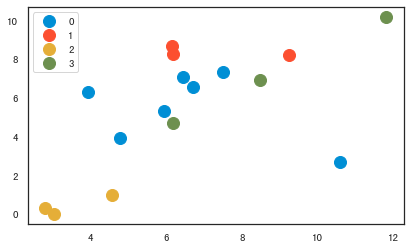

In [226]:
import matplotlib.pyplot as plt
# 对于分组变量的处理

import pandas as pd

#create DataFrame
df = pd.DataFrame({'x': kk['氧化铝(Al2O3)'].values,
                   'y': kk['氧化钙(CaO)'].values,
                   'z': labels})

groups = df.groupby('z')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=12, label=name)

plt.legend()

In [227]:
kk_cluster['cluster'] = labels

In [228]:
merged_df = pd.DataFrame()
n_clusters = 4
for i in range(n_clusters):
    test = pd.DataFrame(kk_cluster[kk_cluster['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = kk_cluster[kk_cluster['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])

merged_df


,二氧化硅(SiO2),氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),五氧化二磷(P2O5),氧化锶(SrO),氧化钾(K2O),编号,size
cluster,,,,,,,,,,,,
0.0,66.106337,0.00,5.621374,1.251611,6.558095,2.021474,3.389524,1.810839,0.032143,10.392017,5.428571,7
1.0,62.220000,2.78,8.400000,0.393333,7.190000,1.266667,2.090000,0.476667,0.013333,13.110000,14.333333,3
2.0,80.528889,0.00,0.446667,2.147668,3.470000,1.702587,1.174532,0.846667,0.023333,8.634427,12.333333,3
3.0,66.614104,0.00,7.285128,1.359663,8.825556,2.180086,1.806579,1.464708,0.000000,0.692632,23.333333,3


In [229]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 186 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 186 missing from current font.
  font.set_text(s, 0, flags=flags)


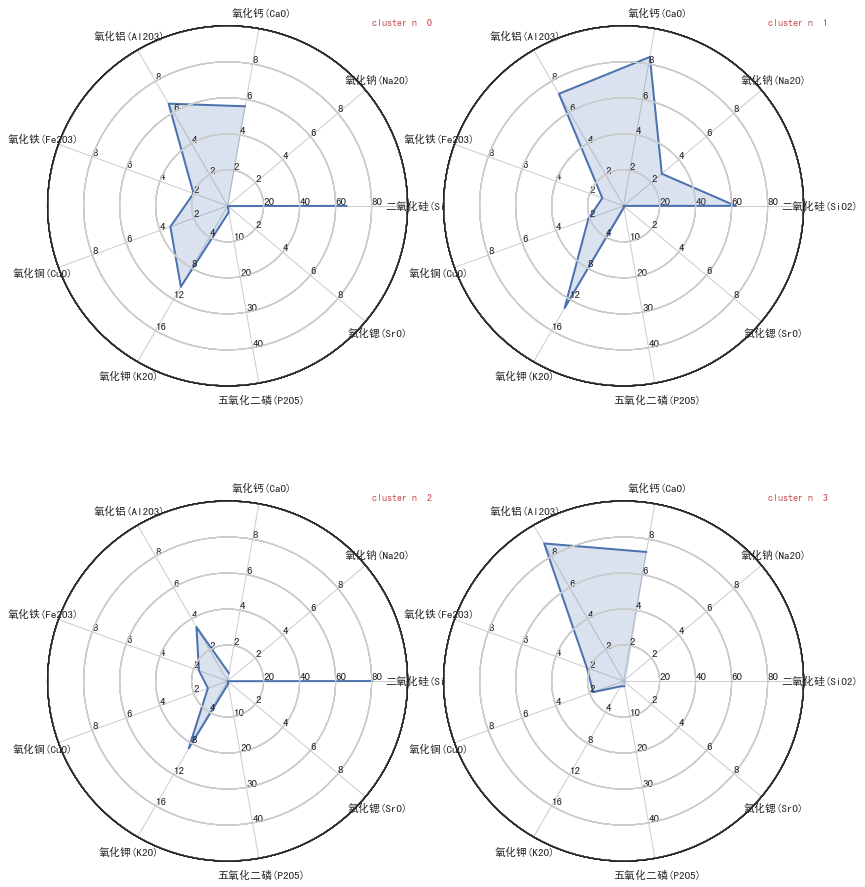

In [230]:
fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')
fig = plt.figure(figsize=(10,12))

attributes = ['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钙(CaO)', '氧化铝(Al2O3)','氧化铁(Fe2O3)','氧化铜(CuO)','氧化钾(K2O)','五氧化二磷(P2O5)','氧化锶(SrO)']
ranges = [[0.01, 100], [0.01, 10], [0.01, 10], [0.01, 10],[0.01, 10],[0.01, 10],[0.01, 20], [0.01, 50], [0.01, 10]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
n_clusters = 4
n_groups = n_clusters ; i_cols = 2
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%2 ; iy = i_rows - ind//2
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1 


### 铅钡玻璃

这里要进行处理的,对于有重复的检验点是要去重的,聚类是按照每一个独立的样本来看的:

In [485]:
qb = pd.concat([transformed_data, data_type_2.drop(['类型','表面风化','氧化钾(K2O)','二氧化硫(SO2)'], axis = 1)], axis = 0)
qb = qb.groupby('编号').mean()
qb = pd.DataFrame(qb.values, columns = columns)
qb

,二氧化硅(SiO2),氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2)
0,64.068336,0.000000,0.713435,1.203496,7.699735,2.488427,0.123491,24.120078,0.000000,0.171411,0.000000,0.000000
1,52.838783,0.000000,0.451233,0.000000,2.183146,0.000000,8.289631,13.415346,22.879433,0.172371,0.245525,0.000000
2,59.317955,0.000000,1.248523,0.724137,3.986469,0.000000,3.925829,11.876417,10.703443,3.273914,0.245525,0.000000
3,61.789391,0.000000,0.893319,0.651382,4.797217,1.779359,2.795063,18.168666,5.527500,3.081947,0.000000,0.000000
4,37.360000,0.000000,0.000000,0.000000,5.450000,1.510000,4.780000,9.300000,23.550000,5.750000,0.000000,0.000000
5,53.790000,7.920000,0.500000,0.710000,1.420000,0.000000,2.990000,16.980000,11.860000,0.000000,0.330000,0.000000
6,31.940000,0.000000,0.470000,0.000000,1.590000,0.000000,8.460000,29.140000,26.230000,0.140000,0.910000,0.000000
7,50.610000,2.310000,0.630000,0.000000,1.900000,1.550000,1.120000,31.900000,6.650000,0.190000,0.200000,0.000000
8,9.759696,0.000000,1.070671,0.000000,1.922472,0.000000,2.866731,13.995368,25.971050,0.434377,0.510856,0.000000
9,68.080000,0.000000,1.340000,1.000000,4.700000,0.410000,0.330000,17.140000,4.040000,1.040000,0.120000,0.230000


In [486]:
qb['编号'] = list([ 2	,
8	,
11,
19,
20,
23,
24,
25,
26,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44,
45,
46,
47,
48,
49,
50,
51,
52,
53,
54,
55,
56,
57,
58])

In [502]:
qb_cluster = qb.drop(['氧化锡(SnO2)'],axis =1 )

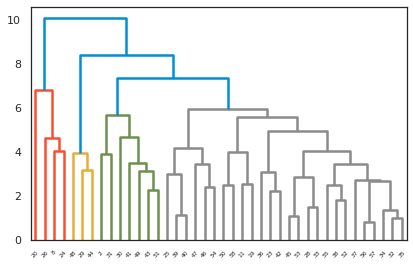

In [503]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd


# Remove the grain species from the DataFrame, save for later
varieties = list([ 2	,
8	,
11,
19,
20,
23,
24,
25,
26,
28,
29,
30,
31,
32,
33,
34,
35,
36,
37,
38,
39,
40,
41,
42,
43,
44,
45,
46,
47,
48,
49,
50,
51,
52,
53,
54,
55,
56,
57,
58])

# Extract the measurements as a NumPy array

sc = StandardScaler()
norm_qb = sc.fit_transform(qb_cluster)

samples = norm_qb

"""
Perform hierarchical clustering on samples using the
linkage() function with the method='complete' keyword argument.
Assign the result to mergings.
"""
mergings = linkage(samples, method='complete')

"""
Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.
"""
dendrogram(mergings,
 labels=varieties,
 leaf_font_size=6,
 )

plt.show()

In [504]:
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
norm = sc.fit_transform(qb_cluster)

model = PCA().fit(norm) # 构造并拟合模型
print('特征值是：\n', model.explained_variance_)
print('各主成分贡献率：\n', model.explained_variance_ratio_)
model.explained_variance_ratio_[0:7].sum()

特征值是：
 [3.21719771 2.29452029 2.02576541 1.29733081 0.93549286 0.67993293
 0.5081279  0.42939162 0.37250254 0.25667362 0.21674784 0.07400879]
各主成分贡献率：
 [0.26139731 0.18642977 0.16459344 0.10540813 0.0760088  0.05524455
 0.04128539 0.03488807 0.03026583 0.02085473 0.01761076 0.00601321]


0.890367392560516

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


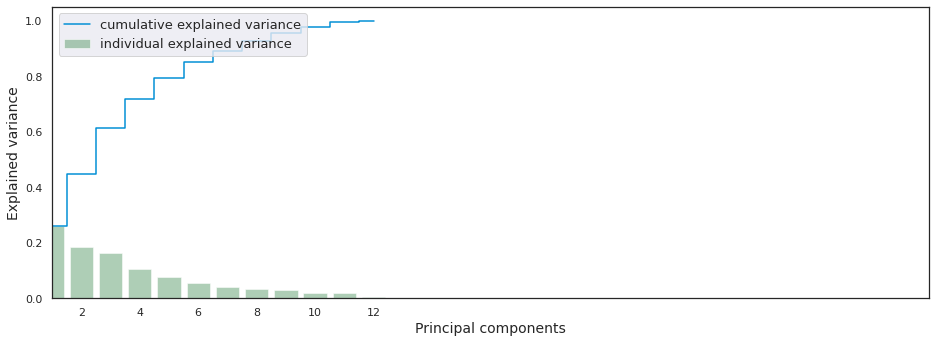

In [505]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)

# 注意！下面的norm应该是shape[1]，这里用0是因为特征数大于样本数的情况
plt.step(range(norm.shape[1]), model.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,norm.shape[1]+1), model.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 30)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

In [506]:
X_reduced= PCA(n_components=7).fit_transform(norm) # model.components_是系数

明显看出肘部位置是在聚类数为3的时候：

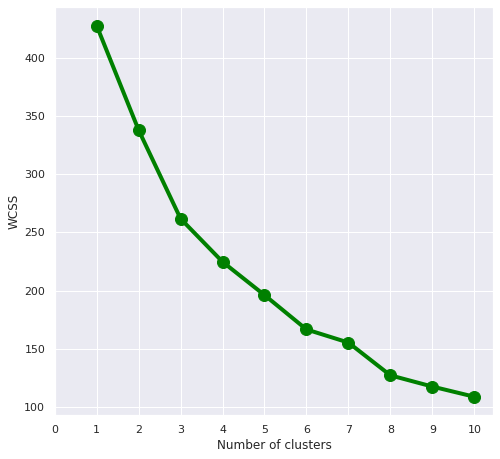

In [507]:
# find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X_reduced)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [508]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = 'k-means++').fit(X_reduced)
labels = model.labels_
labels

array([2, 0, 0, 2, 0, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [509]:

def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  


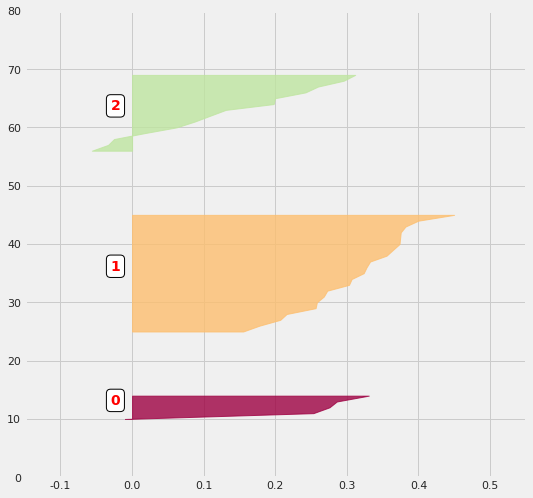

In [519]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

scaled_matrix = X_reduced
clusters_clients = labels
n_clusters = 3

sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)


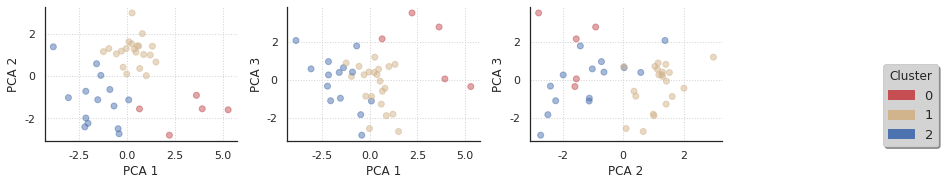

In [511]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

mat = pd.DataFrame(X_reduced)

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in labels]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(3):
    for iy in range(ix+1, 3):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break

#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(3):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

In [512]:
qb['cluster'] = labels
qb_cluster['cluster'] = labels

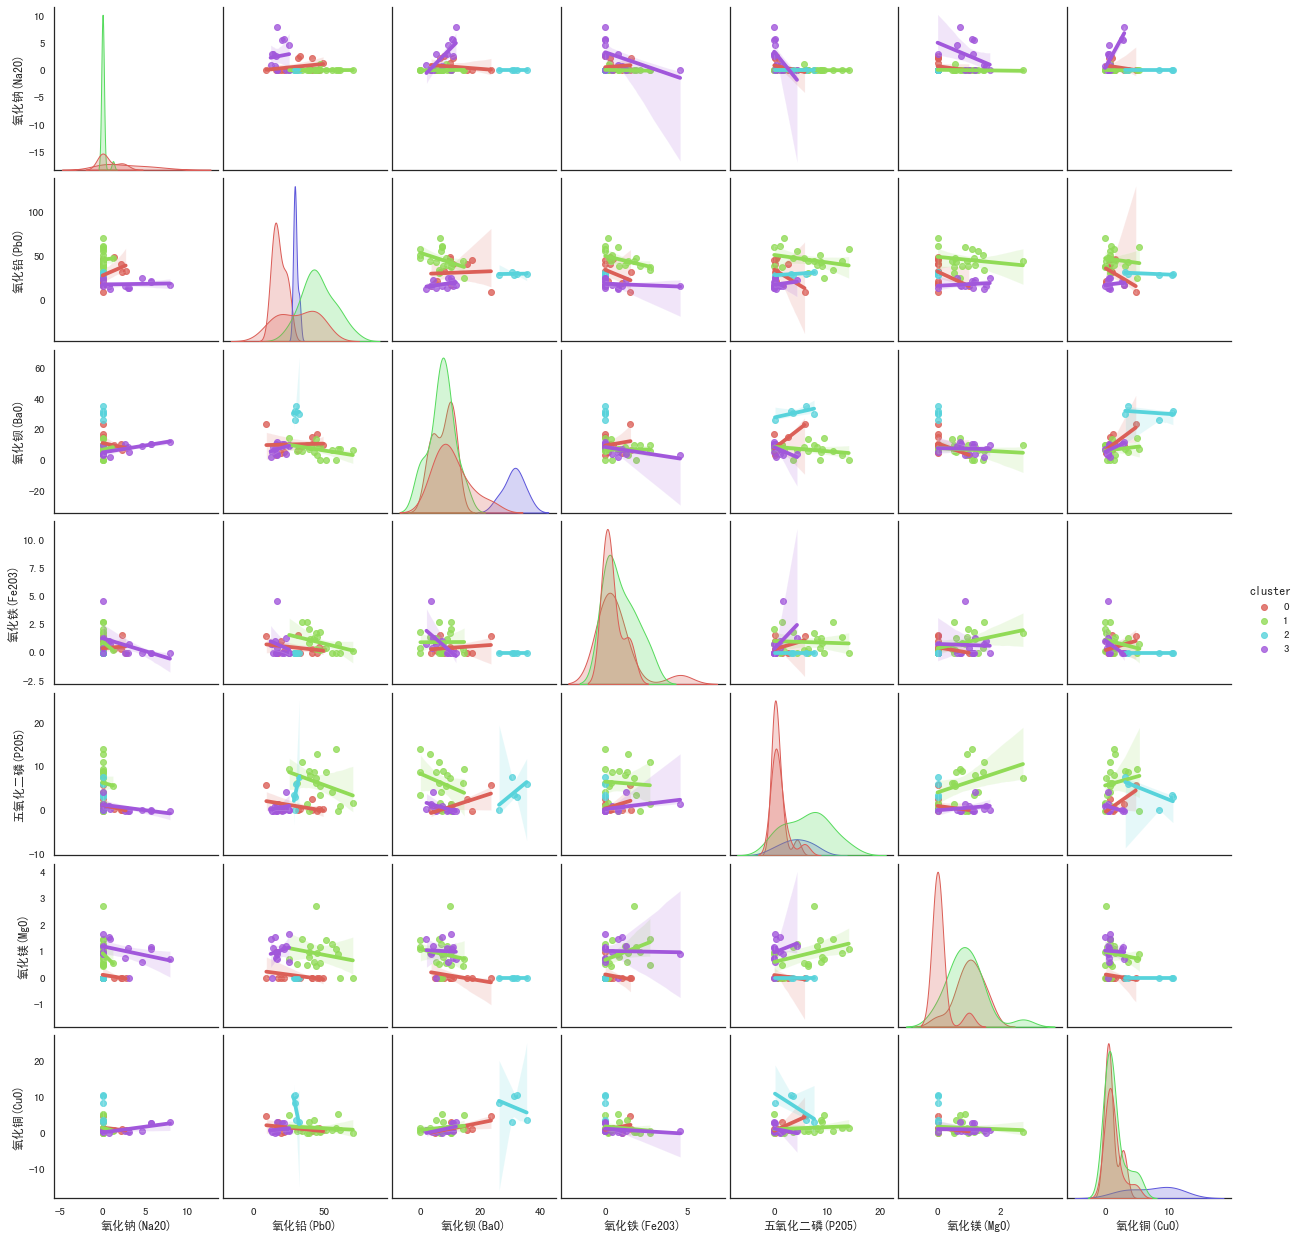

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import MultipleLocator
%matplotlib inline
import matplotlib as mpl
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')
sns.pairplot(qb[['氧化钠(Na2O)','氧化铅(PbO)','氧化钡(BaO)','氧化铁(Fe2O3)','五氧化二磷(P2O5)','氧化镁(MgO)','氧化铜(CuO)','cluster']]
             ,kind="reg" # 回归线
             ,diag_kind="kde" # 对角分布
             ,hue="cluster" 
             ,palette='hls',
            )

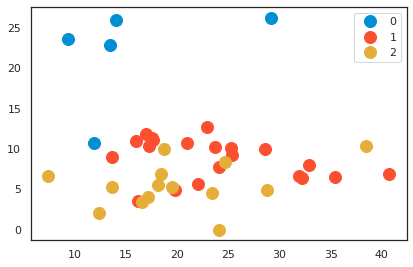

In [513]:
import matplotlib.pyplot as plt
# 对于分组变量的处理

import pandas as pd

#create DataFrame
df = pd.DataFrame({'x': qb['氧化铅(PbO)'].values,
                   'y': qb['氧化钡(BaO)'].values,
                   'z': labels})

groups = df.groupby('z')
for name, group in groups:
    plt.plot(group.x, group.y, marker='o', linestyle='', markersize=12, label=name)

plt.legend()

雷达图：

这个就是把每个聚类的样本的那些指标全求个平均，然后做成4行，每行就是那些特征值的dataFrame：

In [515]:
merged_df = pd.DataFrame()
n_clusters = 3
for i in range(n_clusters):
    test = pd.DataFrame(qb_cluster[qb_cluster['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = qb_cluster[qb_cluster['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])

merged_df


,二氧化硅(SiO2),氧化钠(Na2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),编号,size
cluster,,,,,,,,,,,,,
0.0,38.243287,0.000000,0.648085,0.144827,3.026417,0.302000,5.664438,15.545426,21.866785,1.954133,0.382381,17.800000,5
1.0,58.151191,2.200962,0.534378,0.410911,2.911944,0.149502,0.872295,23.865761,8.742058,0.187470,0.245402,41.857143,21
2.0,58.589392,0.488319,2.171849,0.994841,7.140455,1.577148,0.843722,20.084491,5.506008,1.589647,0.230544,37.357143,14


In [516]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid, labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)


KeyError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 186 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 186 missing from current font.
  font.set_text(s, 0, flags=flags)


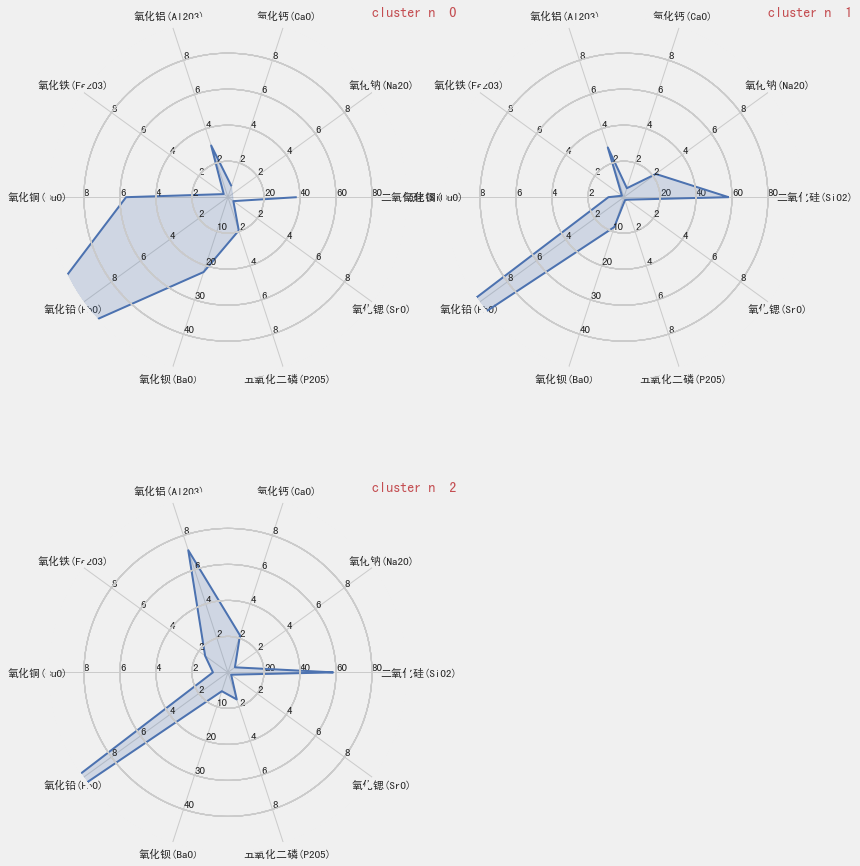

In [520]:
fig = plt.figure(figsize=(10,12))
fontManager.addfont('SimHei .ttf')
mpl.rc('font', family='SimHei')

attributes = ['二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钙(CaO)', '氧化铝(Al2O3)','氧化铁(Fe2O3)','氧化铜(CuO)','氧化铅(PbO)'	,'氧化钡(BaO)','五氧化二磷(P2O5)','氧化锶(SrO)']
ranges = [[0.01, 100], [0.01, 10], [0.01, 10], [0.01, 10],[0.01, 10],[0.01, 10],[0.01, 10], [0.01, 50], [0.01, 10], [0.01, 10]]
index  = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
n_clusters = 4
n_groups = n_clusters ; i_cols = 2
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%2 ; iy = i_rows - ind//2
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    #______________________________________________________
    data = np.array(merged_df.loc[index[ind], attributes])    
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'b', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster nº{}'.format(index[ind]), color = 'r')
    ind += 1 


In [ ]:
kk_index = kk.index
kk_all = data_p2.iloc[kk_index, :]
kk_all

,类型,颜色,表面风化,编号,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),...,氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),纹饰_A,纹饰_B,纹饰_C,严重风化,未风化
0,0,4,0,1,69.33,0.00,9.99,6.32,0.87,3.93,...,0.00,1.17,0.00,0.00,0.39,0,0,1,0,0
2,0,4,0,3,87.05,0.00,5.19,2.01,0.00,4.06,...,0.00,0.66,0.00,0.00,0.00,1,0,0,0,0
3,0,4,0,3,61.71,0.00,12.37,5.87,1.11,5.50,...,2.86,0.70,0.10,0.00,0.00,1,0,0,0,0
4,0,4,0,4,65.88,0.00,9.67,7.12,1.56,6.44,...,0.00,0.79,0.00,0.00,0.36,1,0,0,0,0
5,0,4,0,5,61.58,0.00,10.95,7.35,1.77,7.50,...,0.00,0.94,0.06,0.00,0.47,1,0,0,0,0
6,0,4,0,6,67.65,0.00,7.37,0.00,1.98,11.15,...,1.38,4.18,0.11,0.00,0.00,1,0,0,0,0
7,0,4,0,6,59.81,0.00,7.68,5.41,1.73,10.05,...,0.97,4.50,0.12,0.00,0.00,1,0,0,0,0
8,0,4,1,7,92.63,0.00,0.00,1.07,0.00,1.98,...,0.00,0.61,0.00,0.00,0.00,0,1,0,0,0
11,0,4,1,9,95.02,0.00,0.59,0.62,0.00,1.32,...,0.00,0.35,0.00,0.00,0.00,0,1,0,0,0
12,0,4,1,10,96.77,0.00,0.92,0.21,0.00,0.81,...,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0
